# Exploratory Data Analysis - Telecom Churn Prediction

On average it costs a company more than 05 times more to aquire a new customer than to retain an existing customer. 

Telcom companies spend huge amonuts and energy to recruit new subscibers,and for some reasons, some customers will leave THE network. This becomes a problem, as Telecom companies ussually incur huge costs to attract subscribers. 

We going to perform __Exploratory Data Analysis__ as part of the steps towards building and deploying a churn prediction model, based on the dataset from the BigML website : https://bigml.com/user/francisco/gallery/dataset/5163ad540c0b5e5b22000383

Here are the steps we will take in this EDA section
- Import the necessary Libraries
- Get the Big Picture
- Inspect Missing Values
- Inspect the Dependent Variable
- Insect the Numeric Independent Variable
- Inspect Outliers
- Find other relationships

### 1.) Import the necessary libraries

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

pd.set_option("display.max_columns",None)

import warnings
warnings.filterwarnings("ignore") 

In [22]:
dataset = pd.read_csv("bigml_57a66241af447f0b23000948.csv")
dataset.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### 2.) Getting a Big Picture of the dataset


In [23]:
data = dataset.copy()

In [24]:
data.shape

(3333, 20)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [43]:
data.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [26]:
data.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### 3.) Inspecting Missing Values

In [27]:
#Checking if any column has missing values
data.isnull().any()

State                     False
Account length            False
Area code                 False
International plan        False
Voice mail plan           False
Number vmail messages     False
Total day minutes         False
Total day calls           False
Total day charge          False
Total eve minutes         False
Total eve calls           False
Total eve charge          False
Total night minutes       False
Total night calls         False
Total night charge        False
Total intl minutes        False
Total intl calls          False
Total intl charge         False
Customer service calls    False
Churn                     False
dtype: bool

We notice that there are  no missing values in dataset.

### 4.) Inspecting dependent variable

In [31]:
data.groupby('Churn').size()

Churn
False    2850
True      483
dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

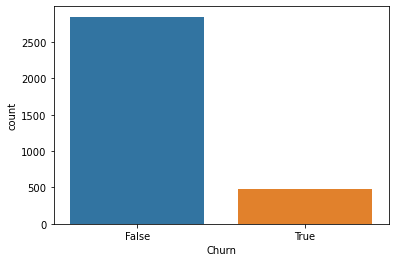

In [32]:
sns.countplot(x = "Churn",data =data)

In [33]:
print(f"Churn is :  {round(data['Churn'].mean()*100,1)} % of the dataset" )

Churn is :  14.5 % of the dataset


This is a slightly unbalanced dataset.So we need to be careful when modeling.Recall will be the performance measurement matrix we would use when training the model.

### 5.) Inspecting Numeric Variables

In [34]:
data.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [35]:
#Grouping all numeric variables
numerical_features = data.select_dtypes(include=["number"])
numerical_features.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [36]:
#Getting discrete features from the general numeric features with a threshol of 20 unique observations
discrete_features = [feature for feature in numerical_features if len(numerical_features[feature].unique()) < 20]
print(len(discrete_features), ": Discrete variables")

2 : Discrete variables


In [37]:
print(discrete_features)

['Area code', 'Customer service calls']


In [38]:
print(data[discrete_features].head())

   Area code  Customer service calls
0        415                       1
1        415                       1
2        415                       0
3        408                       2
4        415                       3


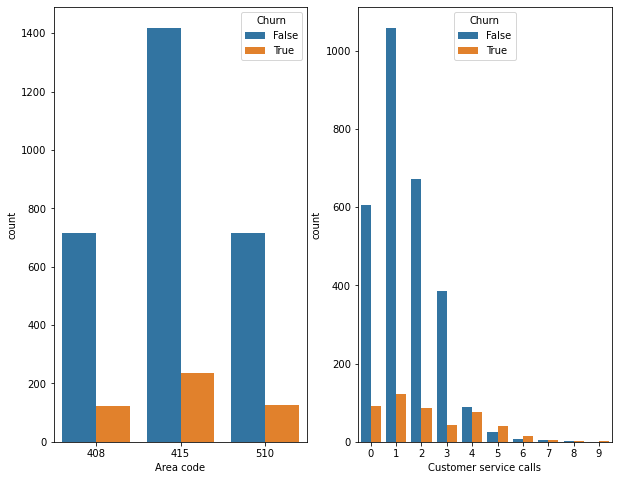

In [39]:
n_rows = 1
n_columns = 2

plt.figure(figsize=(10,8))
for i in enumerate(discrete_features):
    plt.subplot(n_rows,n_columns,i[0]+1)
    sns.countplot(x= i[1],hue = 'Churn', data = data)

#### Creating continuous features

In [40]:
continous_features = [feature for feature in numerical_features if feature not in discrete_features]
print(len(continous_features), ": Continuous variables")

14 : Continuous variables


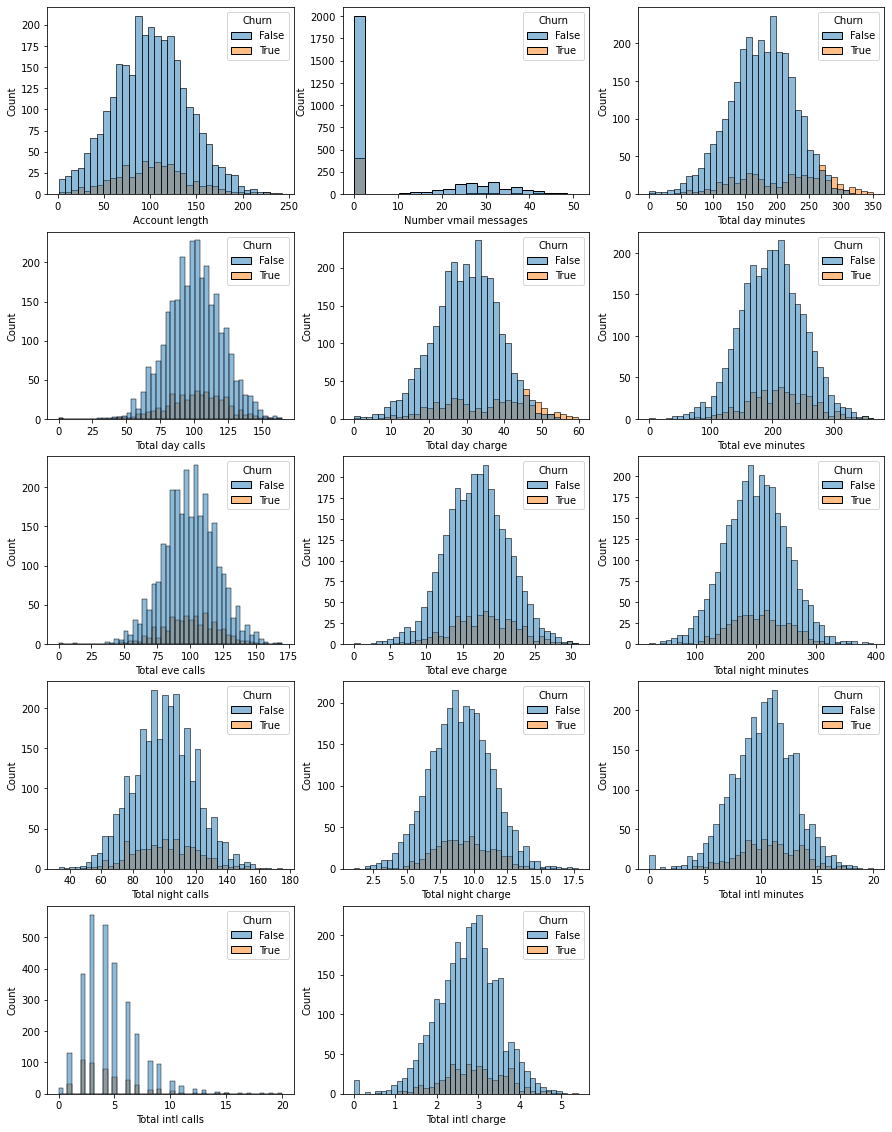

In [41]:
n_rows = 5
n_columns = 3

plt.figure(figsize=(15,20))
for i in enumerate(continous_features):
    plt.subplot(n_rows,n_columns,i[0]+1)
    sns.histplot(x= i[1],hue = 'Churn', data = data)

### 6.) Outliers

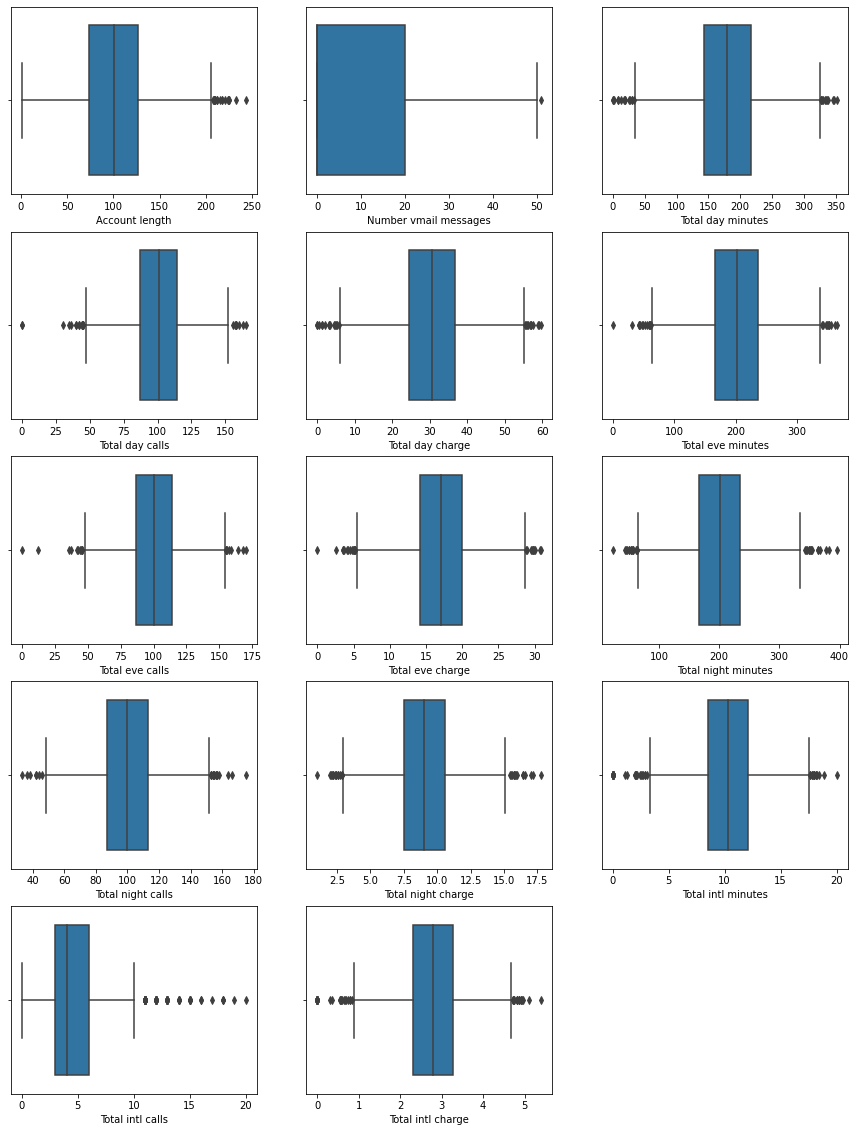

In [42]:
#Plot outliers from all the continuos variables
n_rows = 5
n_columns = 3

plt.figure(figsize=(15,20))
for i in enumerate(continous_features):
    plt.subplot(n_rows,n_columns,i[0]+1)
    sns.boxplot(x= i[1],hue = 'Churn', data = data)

### Categorical variables

In [47]:
categorical_features = data.select_dtypes(include=["object"])
print(categorical_features.head())

  State International plan Voice mail plan
0    KS                 No             Yes
1    OH                 No             Yes
2    NJ                 No              No
3    OH                Yes              No
4    OK                Yes              No


In [48]:
for feature in categorical_features:
    print(f"The feature is {feature} and there are {len(data[feature].unique())} categories" )

The feature is State and there are 51 categories
The feature is International plan and there are 2 categories
The feature is Voice mail plan and there are 2 categories


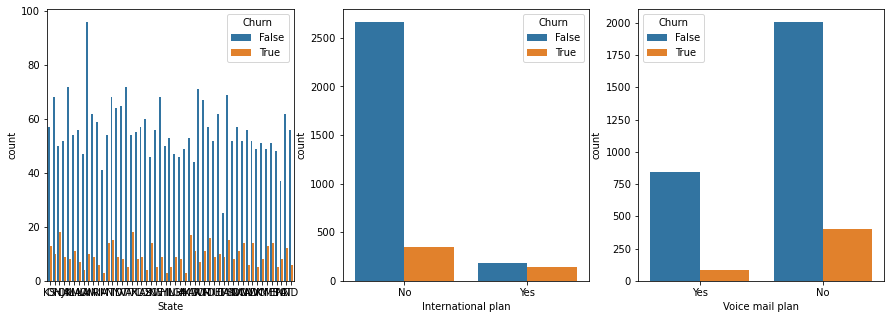

In [157]:
n_rows = 1
n_columns = 3

plt.figure(figsize=(15,5))
for i in enumerate(categorical_features):
    plt.subplot(n_rows,n_columns,i[0]+1)
    sns.countplot(x= i[1],hue = 'Churn', data = data)

### Relationships

In [155]:
corrMatrix = data.corr()
#print(corrMatrix)

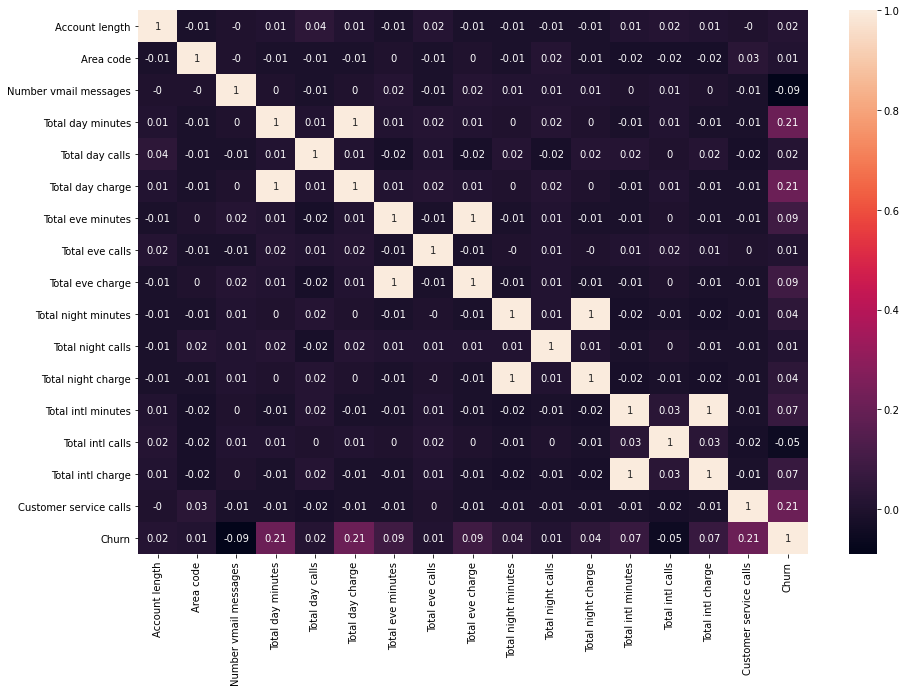

In [154]:
plt.figure(figsize=(15,10))
sns.heatmap(np.round(corrMatrix,2), annot=True)
plt.show()

We see a strong correlation in some columns, such as "Day Charge" and "Day minutes".So one of them will be removed during feature selection to avoid multi-collinearity issues.

### Inspecting the variables with high correlation

#### a.) Day minutes,Calls,Charge

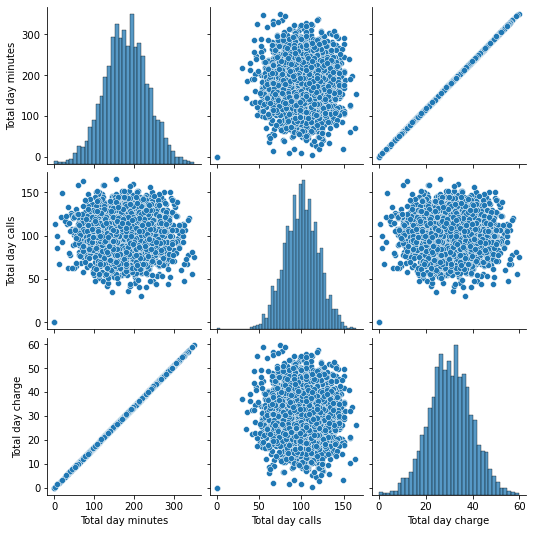

In [58]:
sns.pairplot(data.loc[:,['Total day minutes','Total day calls','Total day charge']])

Strong positive correlation between Day charge and Day Mins.

<AxesSubplot:xlabel='Total day minutes', ylabel='Count'>

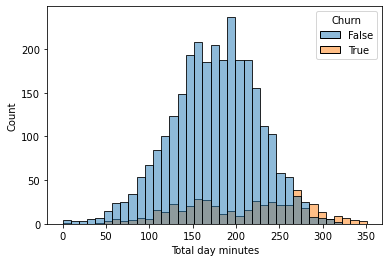

In [59]:
sns.histplot(x="Total day minutes",hue = "Churn", data = data)

More churn for customers with high Total day mins.

<AxesSubplot:xlabel='Total day calls', ylabel='Count'>

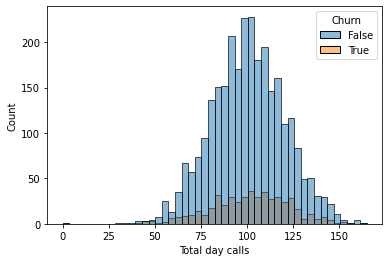

In [60]:
sns.histplot(x="Total day calls",hue = "Churn", data = data)

Not having a very interesting correlation.

#### b.) Evening mins,calls,charge

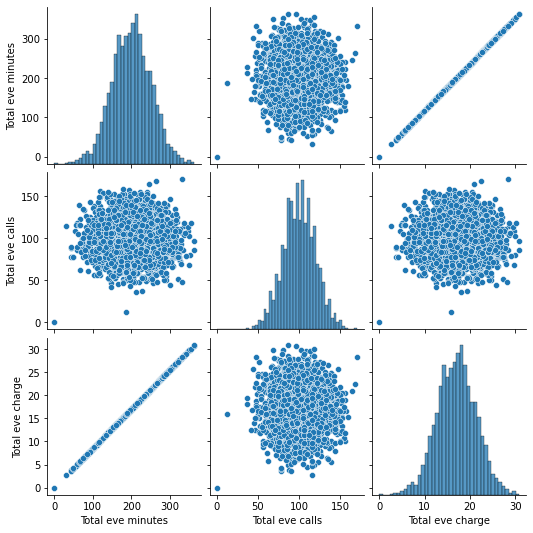

In [66]:
sns.pairplot(data.loc[:,['Total eve minutes','Total eve calls','Total eve charge']])

Strong positive correlation between Day charge and Day Mins.

<AxesSubplot:xlabel='Total eve minutes', ylabel='Count'>

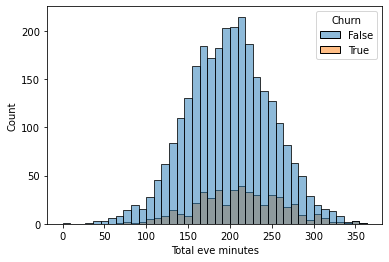

In [64]:
sns.histplot(x="Total eve minutes",hue = "Churn", data = data)

The correlation is very slight

<AxesSubplot:xlabel='Total eve calls', ylabel='Count'>

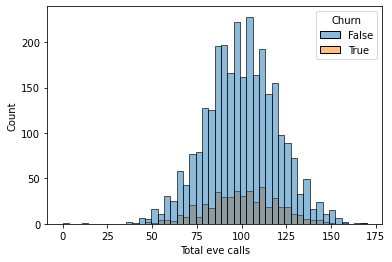

In [65]:
sns.histplot(x="Total eve calls",hue = "Churn", data = data)

No interesting correlation

#### c.) Night mins,calls,charge

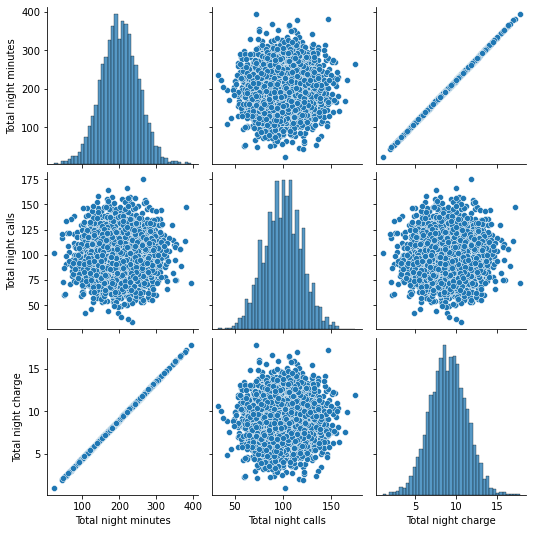

In [68]:
sns.pairplot(data.loc[:,['Total night minutes','Total night calls','Total night charge']])

Strong positive correlation between Day charge and Day Mins.

<AxesSubplot:xlabel='Total night minutes', ylabel='Count'>

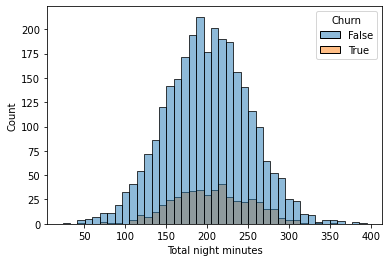

In [69]:
sns.histplot(x="Total night minutes",hue = "Churn", data = data)

No interesting correlation

<AxesSubplot:xlabel='Total night calls', ylabel='Count'>

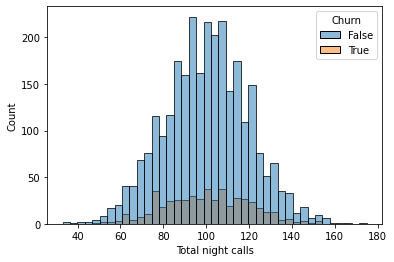

In [70]:
sns.histplot(x="Total night calls",hue = "Churn", data = data)

No interesting correlation

#### d.) Intl mins,calls,charge

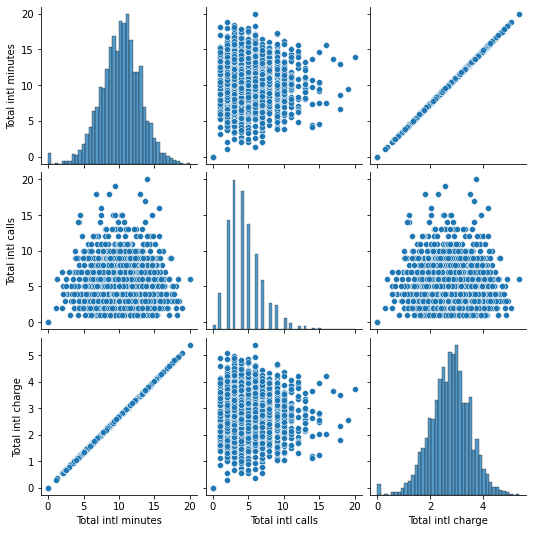

In [73]:
sns.pairplot(data.loc[:,['Total intl minutes','Total intl calls','Total intl charge']])

Strong positive correlation between Day charge and Day Mins.

<AxesSubplot:xlabel='Total intl minutes', ylabel='Count'>

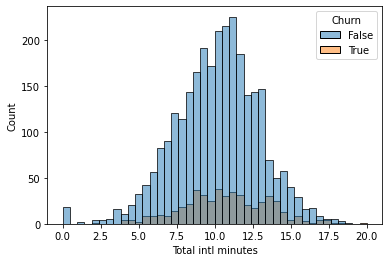

In [74]:
sns.histplot(x="Total intl minutes",hue = "Churn", data = data)

A slight correation is observed.

<AxesSubplot:xlabel='Total intl calls', ylabel='Count'>

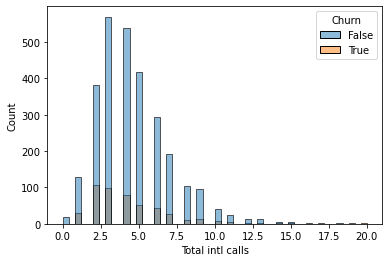

In [75]:
sns.histplot(x="Total intl calls",hue = "Churn", data = data)

Looks like it could have some correlations with the Dependent Variable.